In [1]:
import pandas as pd

file_path = "Employee Attrition.csv"
df = pd.read_csv(file_path)

print("原始数据集信息：")
print(df.info())

df = df.dropna() 

df = df.drop_duplicates()

df['satisfaction_level'] = df['satisfaction_level'].astype(float)

print(df.info())

原始数据集信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 ------------

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 使用标签编码对'dept'和'salary'进行编码
label_encoder = LabelEncoder()
df['dept_encoded'] = label_encoder.fit_transform(df['dept'])
df['salary_encoded'] = label_encoder.fit_transform(df['salary'])

# 输出编码后的数据
print("标签编码后的数据集信息：")
print(df.info())

标签编码后的数据集信息：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 15786
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  dept_encoded           14999 non-null  int32  
 11  salary_encoded         14999 non-null  int32  
dtypes: float64(8), int32(2), object(2)
memory usage: 1.4+ MB
None


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

X = df.drop(['satisfaction_level', 'dept', 'salary', 'Emp ID', 'last_evaluation'], axis=1)
y = df['satisfaction_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义模型
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# 训练和评估每个模型
mse_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_results[model_name] = mse
    
    print(f"{model_name} MSE: {mse}")

Linear Regression MSE: 0.05920957593545316
Random Forest MSE: 0.036536934726923743
Support Vector Regression MSE: 0.05200420675853086
Decision Tree Regression MSE: 0.05610709375533764
K-Nearest Neighbors MSE: 0.04285982666666666
Ridge Regression MSE: 0.05920962084731614
Lasso Regression MSE: 0.06110425235056756


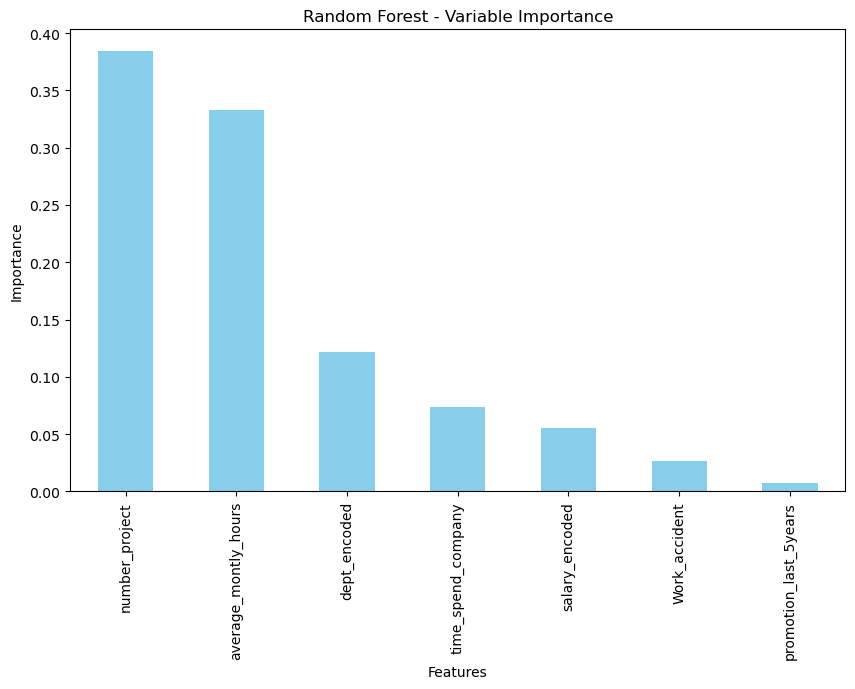

In [4]:
# 使用随机森林进行训练
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# 获取变量重要性
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 可视化变量重要性
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Random Forest - Variable Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

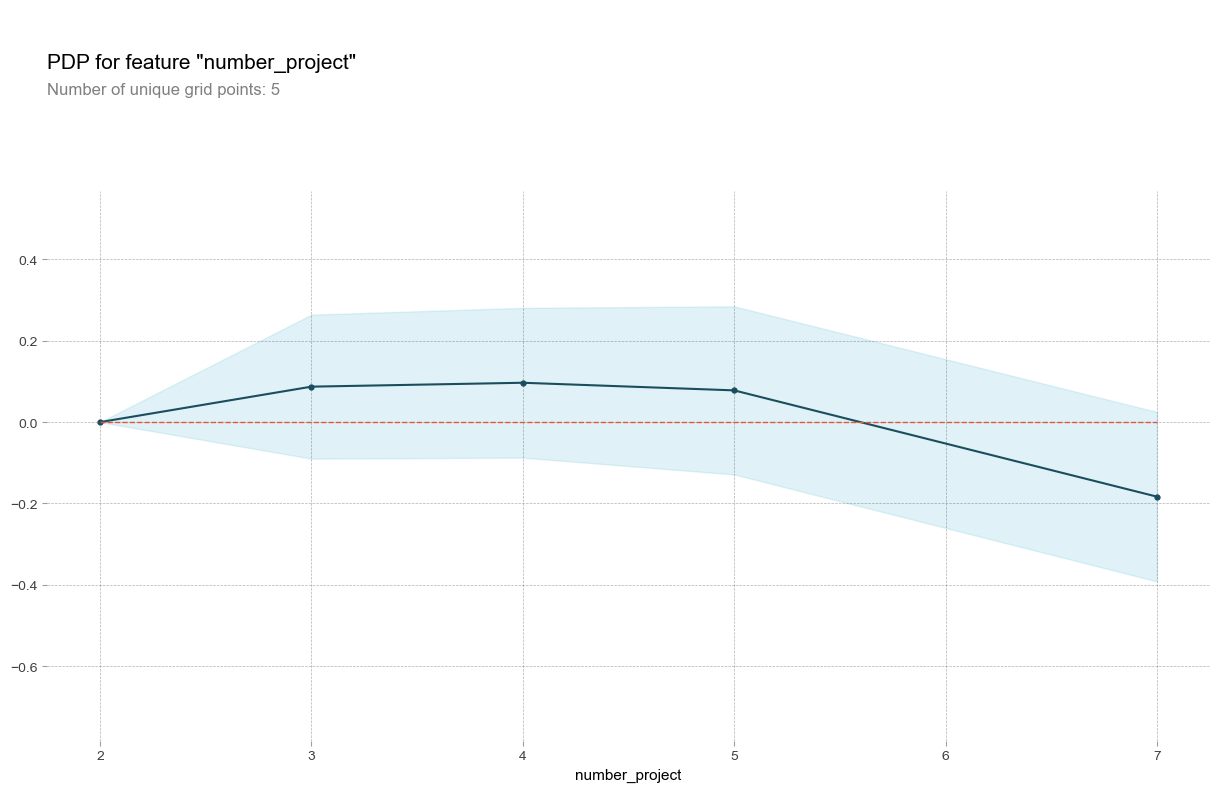

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt

feature_to_plot = 'number_project'

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=X, model_features=X.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

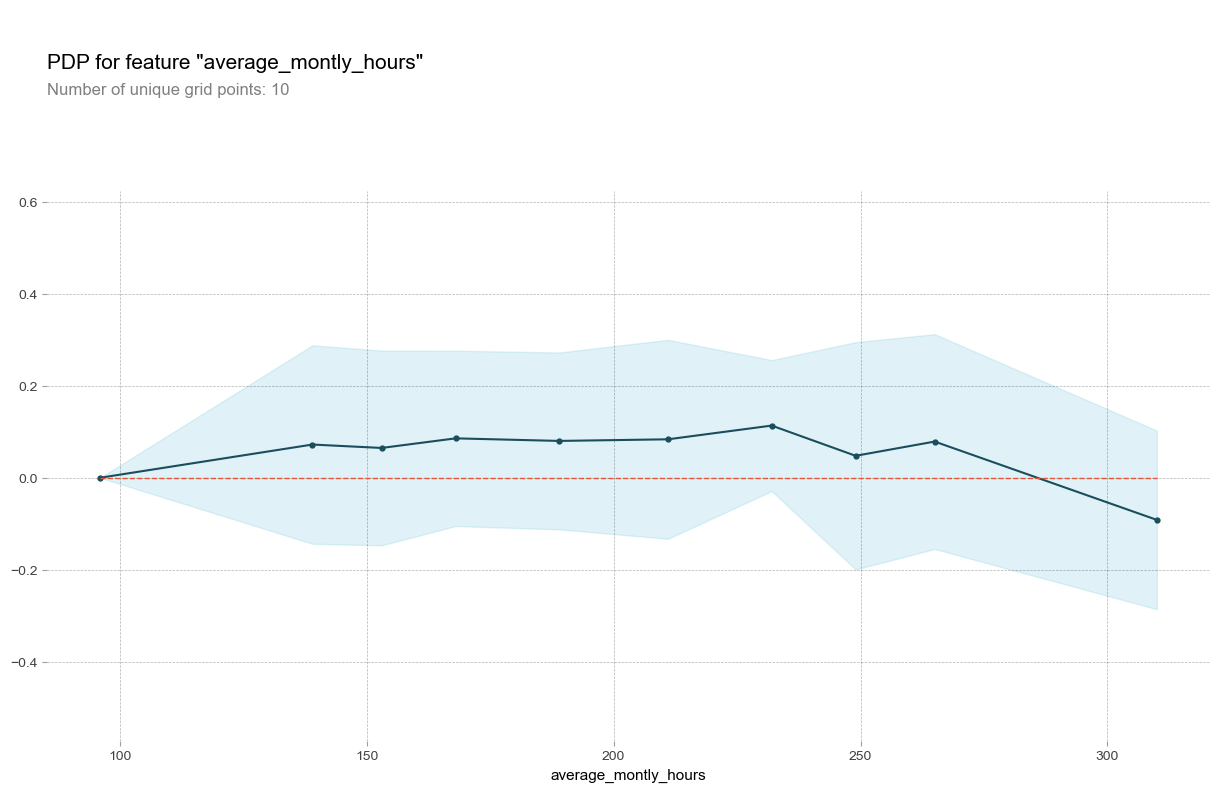

In [7]:
feature_to_plot = 'average_montly_hours'

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=X, model_features=X.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()